# Trabajo Práctico 1 - Organización de Datos
## Análisis exploratorio de datos de TROCAFONE
### Facultad de Ingeniería de la Universidad de Buenos Aires
### 95-58: Organización de Datos - 2do Cuat. 2018

#### Integrantes: Gonzalo Diz,  Ariel Windey, Gabriel Robles y Matías



## Análisis Exploratorio sobre el set de datos

En este apartado se pretende lograr un entendimiento básico de los datos con los que se cuenta y se va a trabajar. Exploraremos los datos sin (aún) hacerse preguntas sobre los mismos.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 51)

# Carga del set de datos
df = pd.read_csv('./data/events.csv')

Tomamos 10 muestras de los datos, simplemente para ver cómo vienen.

In [56]:
df.sample(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
858852,2018-05-04 03:07:23,viewed product,daa4070d,NaN,"7,014.00",iPhone 6S Plus,Muito Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91924,2018-05-08 20:38:26,viewed product,193ac767,NaN,"2,929.00",Motorola Moto MAXX,Excelente,64GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498945,2018-05-08 23:21:39,viewed product,7f980053,NaN,"7,057.00",iPhone 6S Plus,Bom,64GB,Prateado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152319,2018-04-20 18:56:38,viewed product,285101a1,NaN,"6,369.00",Samsung Galaxy J5,Excelente,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851412,2018-06-06 20:40:06,viewed product,d8912db9,NaN,291.00,iPhone 5s,Excelente,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981525,2018-03-13 12:05:07,viewed product,f8ce0944,NaN,"2,699.00",iPhone 5s,Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132241,2018-06-05 17:59:07,viewed product,2327e582,NaN,"9,174.00",Motorola Moto X Play 4G Dual,Bom,32GB,Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992812,2018-04-18 11:41:44,brand listing,fb9a01f9,NaN,NaN,NaN,NaN,NaN,NaN,"2721,10100,10085,3659,8259,102,10323,9988,7014...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227651,2018-05-25 22:29:34,viewed product,3bcec3ce,NaN,"10,884.00",Samsung Galaxy A7 2017,Excelente,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175425,2018-05-14 17:36:58,visited site,2e3529e0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct,New,Florianópolis,Santa Catarina,Brazil,Computer,2560x1080,Windows 7,Chrome 66.0


In [57]:
df.shape

(1011288, 23)

El dataset cuenta con 1011288 datos (observaciones) con 23 atributos

#### Como primera observación, podemos decir que hay una gran cantidad de valores nulos: parecen predominar en el set de datos.


Se chequeará el tipo de dato asignado a los daots importados.
La función *load_csv()* se utilizó sin el parámetro que indica el tipo de dato de cada atributo, por lo que es natural que sean del tipo *object*.

In [58]:
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

Creemos importante transformar el atributo *timestamp* dado que como object no es amigable de trabajar. Convirtiéndolo a tipo *datetime* se podrán aprovechar features de pandas sobre este tipo de datos.

Además, los siguientes campos pueden ser categóricos

In [59]:
df['condition'].value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [60]:
df['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [61]:
df['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [62]:
df['country'].value_counts().head()

Brazil           84308
Unknown           2313
United States      465
Argentina           94
Canada              35
Name: country, dtype: int64

In [63]:
df['device_type'].value_counts().head()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

Por lo tanto se harán las siguientes transformaciones de datos:

In [64]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.condition = pd.Categorical(df.condition)
df.channel = pd.Categorical(df.channel)
df.new_vs_returning = pd.Categorical(df.new_vs_returning)
df.country = pd.Categorical(df.country)
df.device_type = pd.Categorical(df.device_type)

In [65]:
df.dtypes

timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                 object
model                               object
condition                         category
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                           category
new_vs_returning                  category
city                                object
region                              object
country                           category
device_type                       category
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

#### Nos hacemos las siguientes preguntas:

1. ¿En qué proporción son nulos los atributos?
2. ¿Existe alguna correlación entre atributos nulos y tipos de evento?
3. ¿Todos los nulos que existen obedecen a la regla de "no todos los atributos se corresponden con todos los eventos", o son por dato faltante?
4. ¿Cual es la proporción entre distintos tipos de eventos en este set de datos?
5. ¿Cual es el rango temporal de los datos?

#### 1. ¿En qué proporción son nulos los atributos?

In [66]:
atributes_null = (df.isna().sum().sort_values() / df.shape[0]) * 100

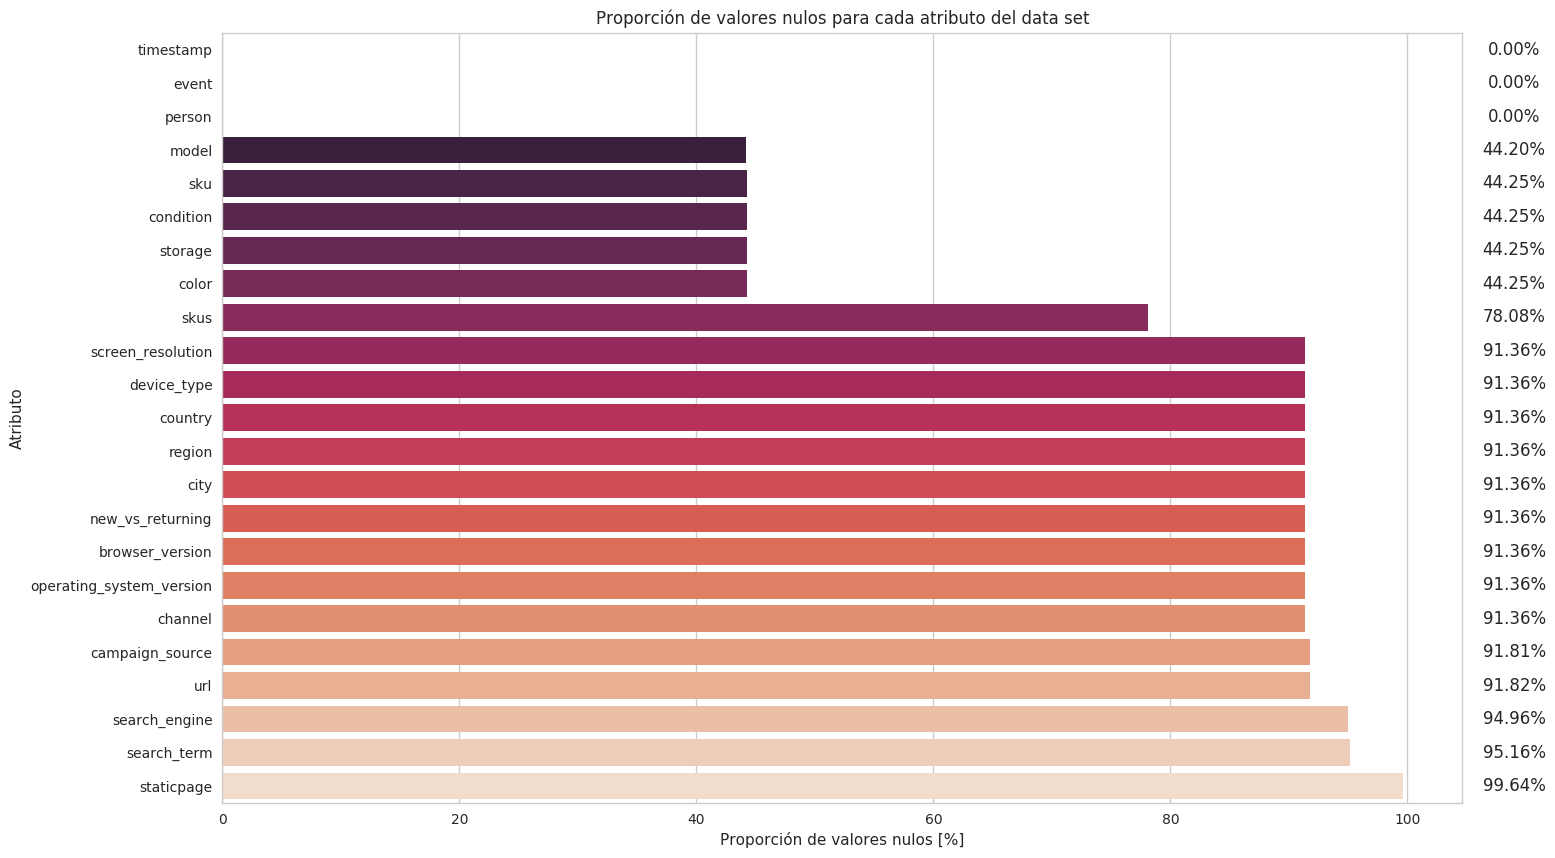

In [67]:
# sns.barplot(x=df_null.index, y=df_null.values, palette="rocket", orient="h")
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette='rocket', orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo del data set")
ax.set(xlabel='Proporción de valores nulos [%]', ylabel='Atributo')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center')

In [68]:
total_null = {'null' : atributes_null.mean(), 'non-null' : 100-atributes_null.mean()}

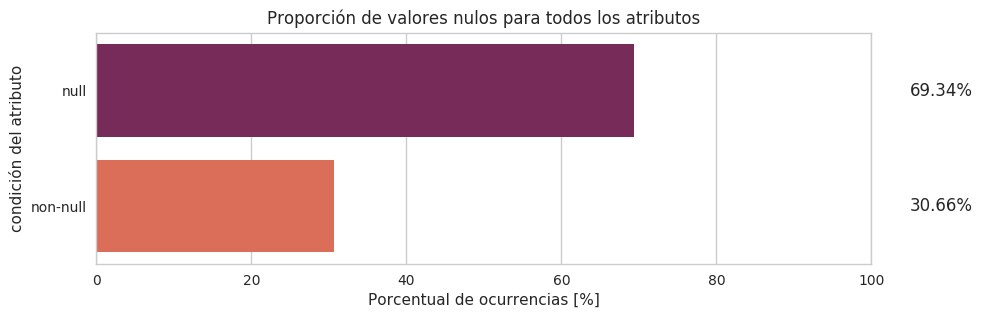

In [69]:
ax2 = sns.barplot(y=pd.Series(total_null).index, x=pd.Series(total_null).values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 3)
ax2.axes.set_xlim(0,100)

plt.title("Proporción de valores nulos para todos los atributos")
ax2.set(xlabel='Porcentual de ocurrencias [%]', ylabel='condición del atributo')

for p in ax2.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center')

Como puede observarse, hay tres atributos que nunca son nulos: timestamp, event y person.
Además, existen grupos de atributos con una proporción idéntica de valores nulos.

#### 2. ¿Existe alguna correlación entre atributos nulos y tipos de evento?

Todo indica que sí, el enunciado aclara:

>"Algo a tener en cuenta es que no todos los datos descritos en las columnas corresponde a todos los tipos de eventos."

Lo que intentaremos responder entonces es ¿Qué atributo se corresponde con qué tipo de evento?

Para responder esto agruparemos el data frame por tipo de evento y setearemos el mismo como índice de fila [1]. Luego, aplicaremos una función lambda para sumar la cantidad de observaciones no nulas [2].
Por último, normalizaremos cada suma de apariciones no nulas, dividéndola por el total de apariciones de ese evento, que no es otra cosa que la cantidad de atributos 'timestamp' no nulos (se vió que este atributo nunca es nulo) [3].

In [70]:
# [1]
df_event_index = df.set_index('event')
# [2]
event_vs_null_atr = df_event_index.groupby('event').apply(lambda x=0: x.notnull().sum())
# [3]
n_event_vs_null_atr = event_vs_null_atr.apply(lambda x: (x/x.max()) * 100, axis=1)
n_event_vs_null_atr

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
event,,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,100.00,100.00,99.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
brand listing,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
checkout,100.00,100.00,0.00,100.00,99.99,99.99,99.99,99.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
conversion,100.00,100.00,0.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
generic listing,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lead,100.00,100.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
search engine hit,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
searched products,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.79,87.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
staticpage,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


[Text(25,0.5,'condición del atributo'),
 Text(0.5,25,'Porcentual de apariciones [%]')]

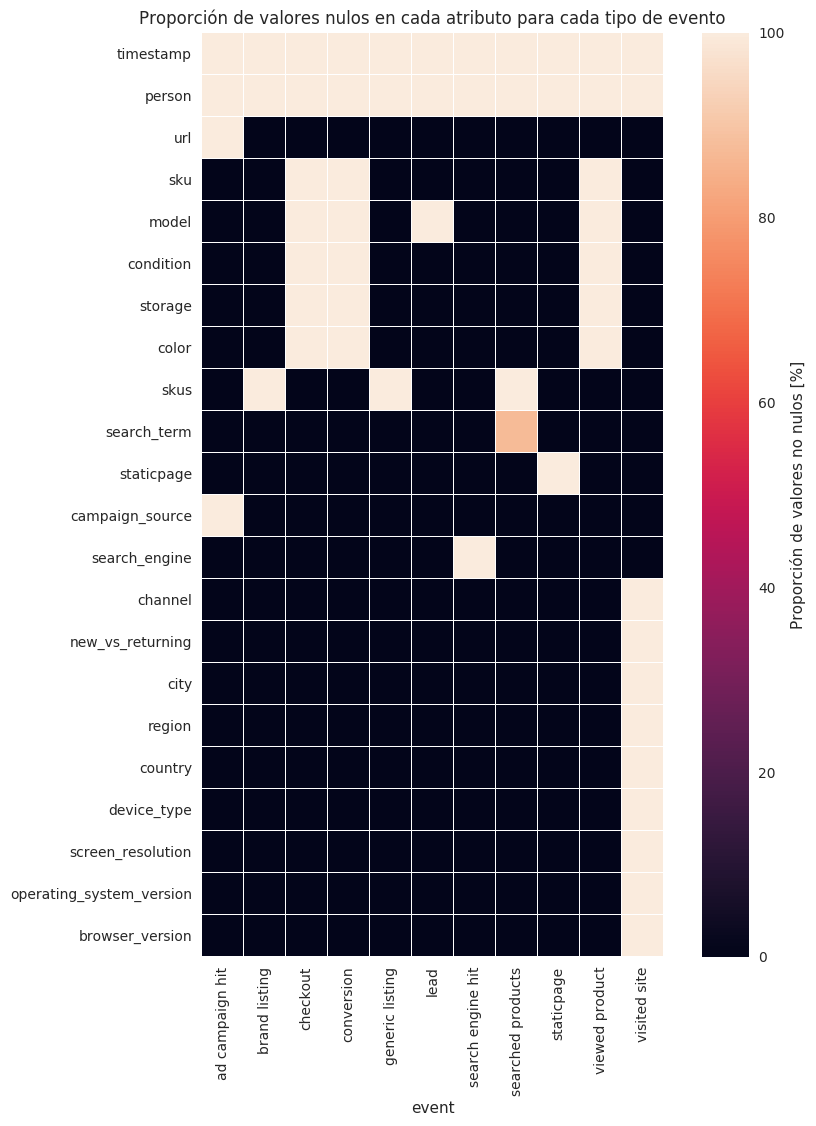

In [71]:
hmp = sns.heatmap(n_event_vs_null_atr.transpose(), linecolor='white', xticklabels=True, yticklabels=True, linewidths=0.2, square=True, cbar_kws={'label': 'Proporción de valores no nulos [%]'})
fig = plt.gcf()
fig.set_size_inches(10, 12)

plt.title("Proporción de valores nulos en cada atributo para cada tipo de evento")
ax2.set(xlabel='Porcentual de apariciones [%]', ylabel='condición del atributo')

En el anterior gráfico se respode la pregunta de ¿Qué atributo se corresponde con qué tipo de evento?

Haciendo una lectura horizontal, puede observarse que:

1. Puede observarse que los atributos timestamp y person son comunes a todos los eventos
2. El atributo url sólo corresponde al evento ad_campaign_hit
3. Los atributos sku, condition, storage y color son compartido entre los eventos checkout, conversion y viewed product.
4. El atributo model es compartido entre checkout, conversion, lead y viewed product.
5. El atributo skus le corresponde a los eventos brand listing, generic listinc y searched products
6. El atributo search tearm sólamente le corresponde al evento searched products. Cabe destacar que el mismo no aparece como valor no nulo en un 100% de las observaciones.
7. El atributo static page le corresponde al evento staticpage únicamente.
8. El atriuto campaign source le corresponde únicamente al evento ad campaign hit.
9. El atriuto search engine le corresponde únicamente al evento sarch engine hit.
10. Los atributos channel, new_vs_returning, city, region, country, device_type, screen resolution, operating system version, y browser version le corresponden únicamente al evento visited site.

####  3. ¿Todos los nulos que existen obedecen a la regla de "no todos los atributos se corresponden con todos los eventos", o son por dato faltante?

En el anterior gráfico puede observarse claramente que la regla de "no todos los atributos se corresponden con todos los eventos" se cumple. Esto explica que haya tanta cantidad de atributos nulos. Sin embargo, existen atributos que se corresponden a un tipo de evento que tienen una pequeña proporción de observaciones nulas.

El caso mas notorio es para el evento 'searched products' con su atributo 'search term' con un aproximado de 13% de oservaciones nulas. Dicho evento significa "El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site." por lo que podemos asumir que el usuario hizo una búsqueda sin un string particular.

El resto de atriutos nulos para ciertos tipos de eventos puede ser despreciable, ya que no superan el 0,1%.

#### ¿Cual es la proporción entre distintos tipos de eventos en este set de datos?

In [72]:
events = df['event'].value_counts()
events

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Rápidamente puede observarse que el evento predominante es 'viewed product'. Primero compararemos este evento contra el resto.

In [73]:
events_index = ['viewed product', 'others']
events_vp_others = pd.Series(events.groupby(events.index != 'viewed product').sum().values, index=['viewed product', 'otros'])

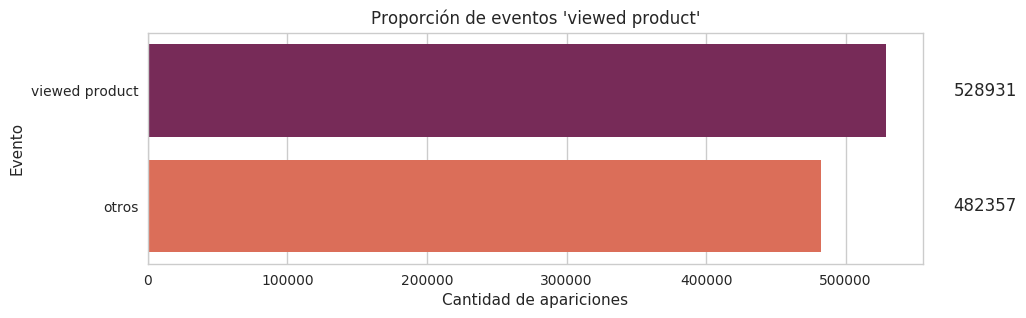

In [74]:
ax2 = sns.barplot(y=events_vp_others.index, x=events_vp_others.values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 3)
#ax2.axes.set_xlim(0,100)

plt.title("Proporción de eventos 'viewed product'")
ax2.set(xlabel='Cantidad de apariciones', ylabel='Evento')

for p in ax2.patches:
    width = p.get_width()
    plt.text(p.get_x()+600000, p.get_y()+0.5*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

Luego compararemos todos los eventos que no son 'viewed product'

[Text(0,0.5,'Evento'), Text(0.5,0,'Proporción de ocurrecias [%]')]

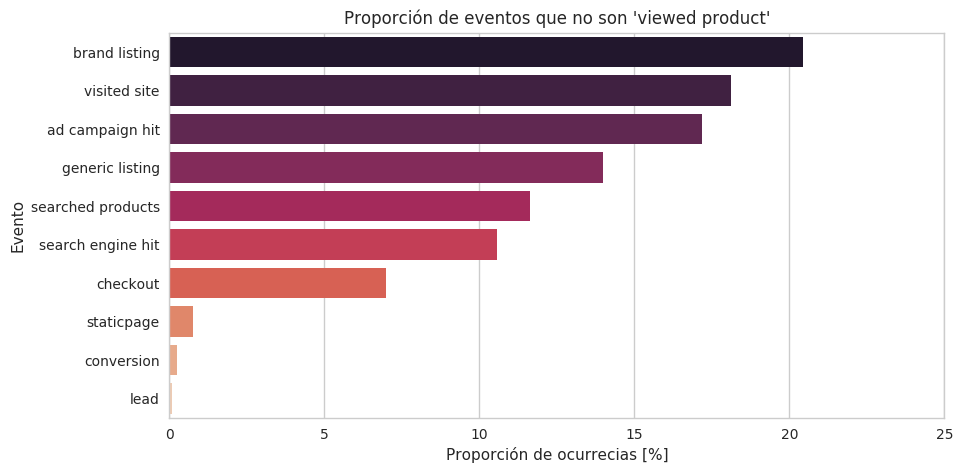

In [75]:
event_others = events[events.index != 'viewed product']
event_others = event_others / event_others.sum() * 100

ax2 = sns.barplot(y=event_others.index, x=event_others.values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 5)
ax2.axes.set_xlim(0,25)

plt.title("Proporción de eventos que no son 'viewed product'")
ax2.set(xlabel='Proporción de ocurrecias [%]', ylabel='Evento')

#### 5. ¿Cual es el rango temporal de los datos?

In [121]:
df.head()
event_dates = df[['timestamp', 'event']].copy()
event_dates.dtypes
event_dates['timestamp'] = event_dates['timestamp'].dt.date
event_dates.groupby(['timestamp', 'event']).agg({"event" : "count"})


event
timestamp  event                   
2018-01-01 ad campaign hit        5
           generic listing        6
           search engine hit      2
           searched products      3
           viewed product         6
           visited site           7
2018-01-02 ad campaign hit       20
           brand listing         45
           checkout               5
           generic listing       36
           search engine hit     20
           searched products     10
           viewed product       122
           visited site          20
2018-01-03 ad campaign hit       34
           brand listing         76
           checkout               3
           generic listing       15
           lead                   1
           search engine hit     23
           searched products      5
           staticpage             4
           viewed product       263
           visited site          30
2018-01-04 ad campaign hit       43
           brand listing         51
           checkout               9
           conversion             2
           generic listing       29
           search engine hit     24
...                             ...
2018-06-13 checkout             996
           conversion             4
           generic listing     1206
           search engine hit   1011
           searched products   1123
           staticpage            53
           viewed product      8802
           visited site        1443
2018-06-14 ad campaign hit     1333
           brand listing       1466
           checkout            1031
           conversion             9
           generic listing     1014
           lead                   8
           search engine hit    873
           searched products   1040
           staticpage            39
           viewed product      8450
           visited site        1303
2018-06-15 ad campaign hit     1193
           brand listing       1442
           checkout             988
           conversion             9
           generic listing      873
           lead                   4
           search engine hit    789
           searched products    722
           staticpage            29
           viewed product      7739
           visited site        1107

[1761 rows x 1 columns]